<a href="https://colab.research.google.com/github/JustAlex5/deep_learning/blob/main/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Ex.3 - ConvNets

Submitted by: **Alex Kovalyov**


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from seaborn import heatmap 

print(tf.__version__)

2.6.0


### Load the CIFAR-10 Dataset

When running this command for the first time, it will download dataset from a remote server, which might take some time.. (in case of server error - just try again a bit later)

In [ ]:
# 1. load/download the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
train_labels = train_labels.flatten()  # (50000, 1) -> (50000,)
test_labels = test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 4. define the 10 classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('train_images.shape =',train_images.shape)
print('train_labels.shape =',train_labels.shape)
print('test_images.shape =',test_images.shape)
print('test_labels.shape =',test_labels.shape)



train_images.shape = (50000, 32, 32, 3)
train_labels.shape = (50000,)
test_images.shape = (10000, 32, 32, 3)
test_labels.shape = (10000,)


*** 
General instructions:

- For each model, the input layer is the images (after flatten it to long vector), and the output layer is a `softmax` of 10 units (one unit for each class).

- Display the `model.summary()` for each model.

- Train each model for **50 epochs** (use: `batch_size=64` and `verbose=0`).

- For each model, **plot the training and testing: loss and accuracy**.

- For each model, **plot the confusion matrix** (using the validation data)

- Summarize the results of all models (for both datasets) in the table below (by editing this markup cell):

(don't forget to turn on the GPU in Google Colab...)


<table>
  <tr>
    <th>Model</th>
    <th>#parameters</th>
    <th>train accuracy</th>
    <th>test accuracy</th>
  </tr>
    
  <!-- copy this block once for every model/dataset you tested -->  
  <tr> 
    <td>0-hidden</td>   <!-- Model -->
    <td>30,730 </td> <!-- #parameters -->
    <td>0.42</td> <!-- train accuracy -->
    <td>0.38</td> <!-- test accuracy -->
  </tr>
    <tr> 
    <td>Simple ConvNet</td>   <!-- Model -->
    <td>2,882,006 </td> <!-- #parameters -->
    <td>0.99</td> <!-- train accuracy -->
    <td>0.60</td> <!-- test accuracy -->
  </tr>
    <tr> 
    <td>Deeper ConvNet</td>   <!-- Model -->
    <td>356,810 </td> <!-- #parameters -->
    <td>0.94</td> <!-- train accuracy -->
    <td>0.71</td> <!-- test accuracy -->
  </tr>
    <tr> 
    <td>Own-net</td>   <!-- Model -->
    <td>1,147,466 </td> <!-- #parameters -->
    <td>0.99</td> <!-- train accuracy -->
    <td>0.70</td> <!-- test accuracy -->
  </tr>???</td> <!-- test accuracy -->
  </tr>
    
 
</table>

---




In [ ]:
def Visualization (history):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'],'r', label='train')
  plt.plot(history.history['val_loss'],':r', label='test')
  plt.title('Loss',fontsize=14)
  plt.xlabel('Epochs',fontsize=14)
  plt.legend()
  plt.grid()

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'],'b', label='train')
  plt.plot(history.history['val_accuracy'],':b', label='test')
  plt.ylim([0, 1])
  plt.title('Accuracy',fontsize=14)
  plt.xlabel('Epochs',fontsize=14)
  plt.legend()
  plt.grid()
  print( "train acc:", history.history['accuracy'][-1])
  print( "test acc:", history.history['val_accuracy'][-1])

In [ ]:
def display_cm(cm):


  # Normalise
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(10,10))
  heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

***
### 1. No hidden layers

Just connect all inputs directly to the output layer (always remember to add a `Flatten` layer before using a `Dense` layer)


In [ ]:
    ###########################
    ###  your code here...  ###
    ###########################
model = Sequential(name='0-hidden')
model.add(Flatten(input_shape=(32, 32,3)))
model.add(Dense(10,activation='softmax')) 
model.summary()
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels))  




Model: "0-hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


train acc: 0.42785999178886414
test acc: 0.3801000118255615


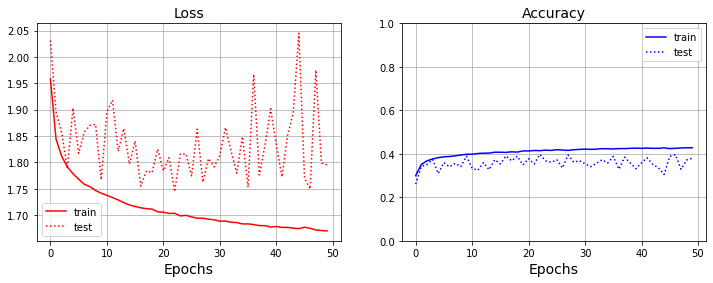

In [ ]:
Visualization(history)

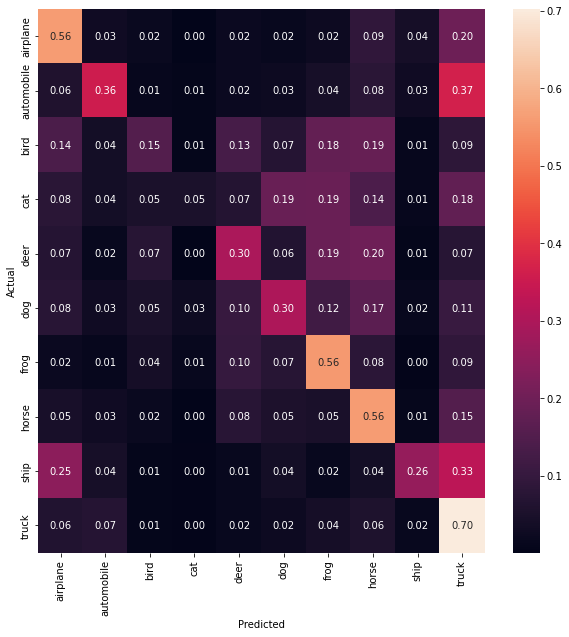

In [ ]:
y_pred = model.predict(test_images)
rounded_pred=np.argmax(y_pred,axis=-1)
cm= confusion_matrix(test_labels, rounded_pred)
display_cm(cm)




***
### 2. Simple ConvNet

Use 32 kernels (3x3, Conv2D), followed by additional 100-Dense layer.


In [ ]:
    ###########################
    ###  your code here...  ###
    ###########################

model = Sequential(name='SimpleConvNet')
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels)) 

Model: "SimpleConvNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               2880100   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 2,882,006
Trainable params: 2,882,006
Non-trainable params: 0
_________________________________________________________________


train acc: 0.9957399964332581
test acc: 0.6082000136375427


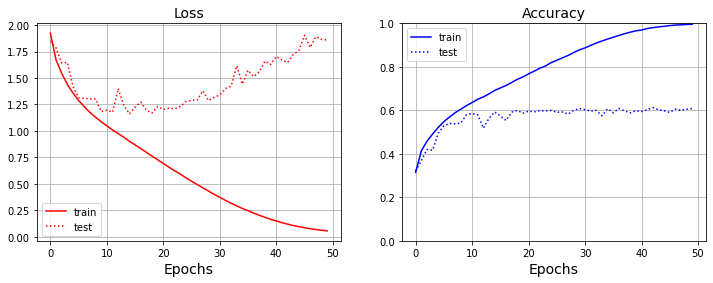

In [ ]:
Visualization(history)

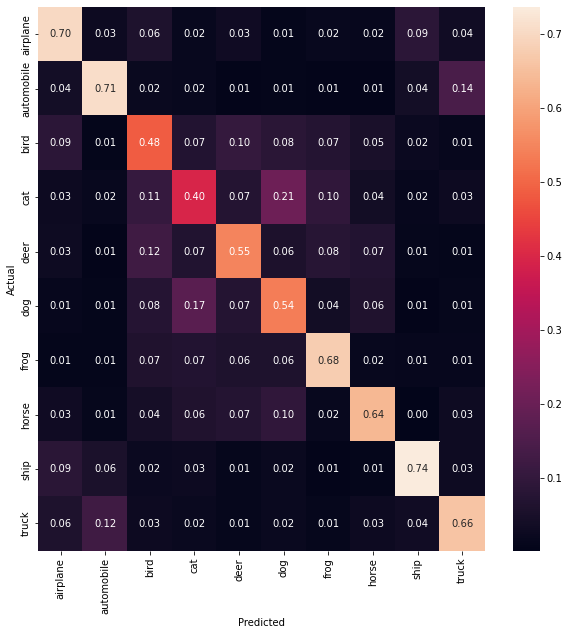

In [ ]:
y_pred = model.predict(test_images)
rounded_pred=np.argmax(y_pred,axis=-1)
cm= confusion_matrix(test_labels, rounded_pred)
display_cm(cm)


***
### 3. Deeper ConvNet

Apply the following layers (between the input and output layers):
- 32 3x3-`Conv2D` + 2x2 `MaxPooling`
- 64 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128-`Dense`

Use `padding='same'` in the Conv2D layers.

In [ ]:
model = Sequential(name='DeeperConvNet')
model.add(Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels)) 

Model: "DeeperConvNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)            

train acc: 0.9498000144958496
test acc: 0.7103000283241272


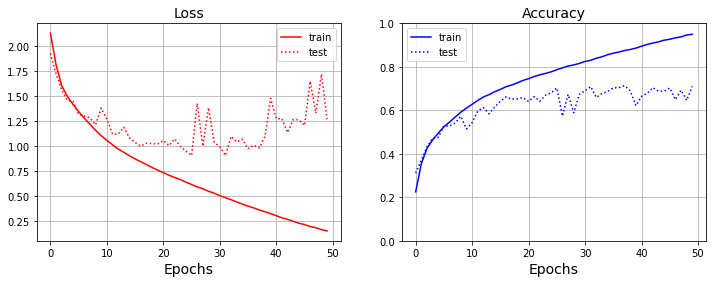

In [ ]:
Visualization(history)

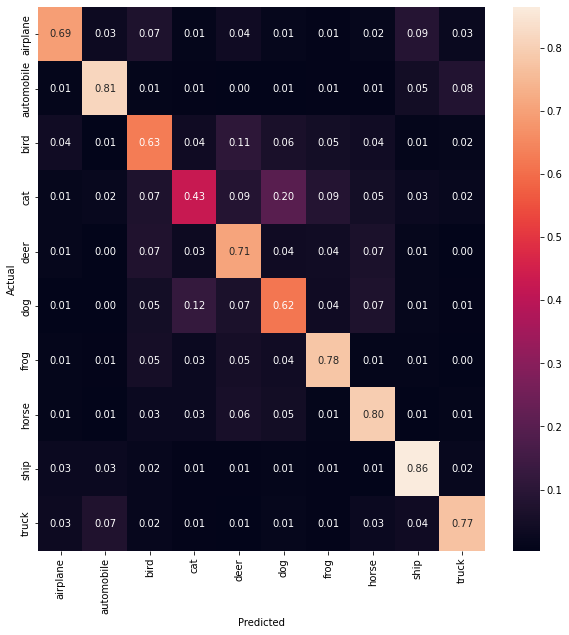

In [ ]:
y_pred = model.predict(test_images)
rounded_pred=np.argmax(y_pred,axis=-1)
cm= confusion_matrix(test_labels, rounded_pred)
display_cm(cm)

***
### 4. Try your own ideas

- Try to come up with your own architecture to get a better results, and test it.

- What do you think limits our validation accuracy?

In [34]:

model = Sequential(name='own')
model.add(Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0,
                        validation_data=(test_images, test_labels)) 





Model: "own"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)              0       

train acc: 0.9988800287246704
test acc: 0.7010999917984009


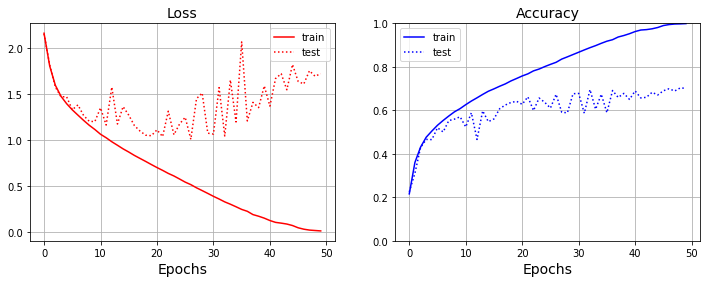

In [36]:
Visualization(history)

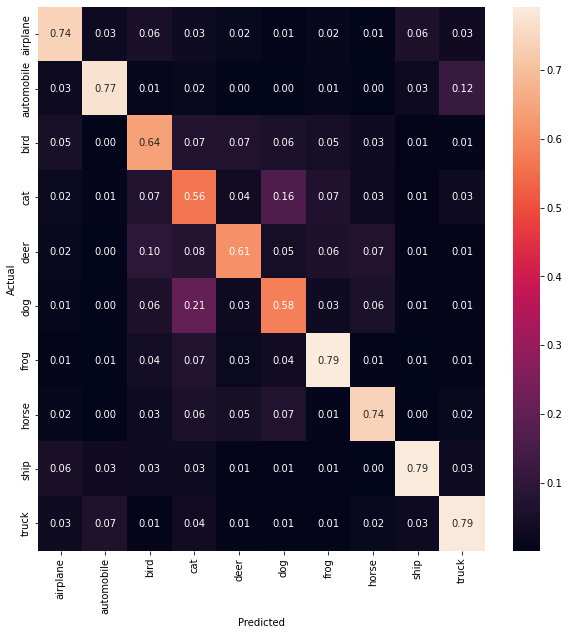

In [35]:
y_pred = model.predict(test_images)
rounded_pred=np.argmax(y_pred,axis=-1)
cm= confusion_matrix(test_labels, rounded_pred)
display_cm(cm)

***
## Good Luck!
- **don't forget to fill the summary table on the top !!**
